#**EXAMEN FINAL**

Alumno: Carmueda Juan Pablo
Centro Politécnico Superior Malvinas Argentinas
[Enlace Web:](https://politecnico.ar/campus/my/)  

1. Importación de librerías

In [1]:
#Importación de librerías
import pandas as pd # Para manipulación y análisis de datos.
import numpy as np # Para operaciones numéricas y manejo de array.
import matplotlib.pyplot as plt # Para gráficos y visualización de datos.
import seaborn as sns  # Para visualización de datos estadísticos.
import sklearn.metrics as sm  # Para métricas de evaluación de modelos de machine learning.
from sklearn import linear_model # Para modelos de regresión lineal y otros modelos estadísticos.
from sklearn.model_selection import train_test_split # Para dividir un conjunto de datos en conjuntos de entrenamiento y prueba de manera aleatoria.
from sklearn.tree import DecisionTreeClassifier # Para modelos de clasificación basados en árboles de decisión.
from sklearn.metrics import accuracy_score # Para evaluar la precisión de un modelo de clasificación.
from sklearn.tree import plot_tree #Para visualizar árboles de decisión.
from sklearn.decomposition import PCA #Para reducción de dimensionalidad y extracción de características.
from sklearn.model_selection import cross_val_score, StratifiedKFold #Para validación cruzada y división estratificada de conjuntos de datos.
from sklearn.preprocessing import StandardScaler #Para estandarizar características de un conjunto de datos, asegurando que tengan media cero y desviación estándar uno.
from sklearn.cluster import KMeans #para agrupamiento de datos en k grupos.
from sklearn.impute import SimpleImputer # Para manejar valores faltantes en un conjunto de datos, reemplazándolos con una estrategia específica como la media, mediana o el valor más frecuente.
from sklearn.metrics import classification_report


2. Carga del data set

El data set se descrgo de la siguiente pagina de Ipiec: https://ipiec.tierradelfuego.gob.ar/estadisticas-economicas-2/
En la sección 14_5_03_Transporte Aéreo. Movimiento de pasajeros por aeropuerto.

In [2]:
df = pd.read_excel(r"C:\Users\pablo\OneDrive\Documentos\PABLO\Tecnicatura\1° Cuat\Aprendizaje Automatico\Examen Parcial\Data_Set_Aeropuerto.xlsx", 
                   engine="openpyxl", 
                   header=3, 
                   nrows=364)
df.head() #Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente.

,Unnamed: 0,Pasajeros desembarcados,Pasajeros embarcados,Unnamed: 3,Pasajeros desembarcados.1,Pasajeros embarcados.1,Unnamed: 6,Pasajeros desembarcados.2,Pasajeros embarcados.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,22655,22633.0,NaN,14057,14023.0,NaN,8598.0,8610.0
2,1971,22335,22751.0,NaN,11232,11529.0,NaN,11103.0,11222.0
3,1972,25300,24181.0,NaN,10585,10353.0,NaN,14715.0,13828.0
4,1973,29399,29676.0,NaN,10580,11748.0,NaN,18819.0,17928.0


3. Proceso transformación y normalización del data SET

In [3]:
#Cambio de nombres de columnas
df = df.rename(columns={"Unnamed: 0": "Año", "Pasajeros desembarcados" : "Pasajeros Desembarcados Totales", "Pasajeros embarcados" : "Pasajeros Embarcados Totales",
                       "Pasajeros desembarcados.1": "Pasajeros Desembarcados Ushuaia", "Pasajeros embarcados.1":"Pasajeros Embarcados Ushuaia",
                       "Pasajeros desembarcados.2": "Pasajeros Desembarcados Rio Grande", "Pasajeros embarcados.2":"Pasajeros Embarcados Rio Grande"})
#Centrar los encabezados
df.head().style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Unnamed: 3,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Unnamed: 6,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
0,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1970,22655,22633.000000,nan,14057,14023.000000,nan,8598.000000,8610.000000
2,1971,22335,22751.000000,nan,11232,11529.000000,nan,11103.000000,11222.000000
3,1972,25300,24181.000000,nan,10585,10353.000000,nan,14715.000000,13828.000000
4,1973,29399,29676.000000,nan,10580,11748.000000,nan,18819.000000,17928.000000


In [4]:
#Eliminación de columnas vacías
df = df.dropna(axis=1, how='all')  # Elimina columnas donde todas las filas son NaN
df = df.dropna(how='all')  # Borra todas las filas vacías
pd.set_option("display.max_rows", None)
df.head()

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
1,1970,22655,22633.0,14057,14023.0,8598.0,8610.0
2,1971,22335,22751.0,11232,11529.0,11103.0,11222.0
3,1972,25300,24181.0,10585,10353.0,14715.0,13828.0
4,1973,29399,29676.0,10580,11748.0,18819.0,17928.0
5,1974,39538,39037.0,12769,12323.0,26769.0,26714.0


In [5]:
#Transformación de datos "…", "..." y "2020 (2)"
pd.set_option('future.no_silent_downcasting', True)
df["Pasajeros Desembarcados Totales"] = df["Pasajeros Desembarcados Totales"].replace("…", np.nan)
df["Pasajeros Desembarcados Ushuaia"] = df["Pasajeros Desembarcados Ushuaia"].replace("…", np.nan)
df["Pasajeros Desembarcados Ushuaia"] = df["Pasajeros Desembarcados Ushuaia"].replace("...", np.nan)
df["Año"] = df["Año"].replace("2020 (2)", "2020")
df["Pasajeros Desembarcados Ushuaia"] = df["Pasajeros Desembarcados Ushuaia"].astype(float)
df.head()

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
1,1970,22655,22633.0,14057.0,14023.0,8598.0,8610.0
2,1971,22335,22751.0,11232.0,11529.0,11103.0,11222.0
3,1972,25300,24181.0,10585.0,10353.0,14715.0,13828.0
4,1973,29399,29676.0,10580.0,11748.0,18819.0,17928.0
5,1974,39538,39037.0,12769.0,12323.0,26769.0,26714.0


In [6]:
#Muestra los tipos de datos de cada columna
print(df.dtypes)

Año                                    object
Pasajeros Desembarcados Totales        object
Pasajeros Embarcados Totales          float64
Pasajeros Desembarcados Ushuaia       float64
Pasajeros Embarcados Ushuaia          float64
Pasajeros Desembarcados Rio Grande    float64
Pasajeros Embarcados Rio Grande       float64
dtype: object


Debido a la configuración del data set donde donde los primeros años solo se registraron datos anuales y posterior mensuales, se generaron dos dataframe uno que contiene los datos anuales y otro con los datos mensuales. 

A continuación se genera el dataframe con datos anuales

In [7]:
#Nuevo data frame con totales por año
totales_año = df.iloc[list(range(1, 29)) + [41,54, 67, 80, 93, 106, 119, 132, 145, 158, 171, 184, 197, 210, 223, 236, 249, 262, 275, 288, 301, 314, 327]]

#Suma de los meses del año 2022 y 2023. La suma se agrega al dataframe.

num_columnas = len(totales_año.columns) - 1  # Excluyendo la columna "Año"
Fila_2022 = [2022] + df.iloc[340:352, 1:num_columnas+1].sum().tolist() # Se suman los valores de las columnas de año 2022
Fila_2023 = [2023] + df.iloc[352:362, 1:num_columnas+1].sum().tolist() # Se suman los valores de las columnas de año 2023

#Se convierte la lista en un DataFrame antes de concatenar
nuevas_filas = pd.DataFrame([Fila_2022, Fila_2023], columns=totales_año.columns)

#Se agrega las nuevas filas al DataFrame original
totales_año = pd.concat([totales_año, nuevas_filas], ignore_index=True)

#Muestra del DataFrame con los nuevos datos
totales_año.tail() #Para ver las últimas filas del DataFrame con los totales de 2022 y 2023.


,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
48,2019,NaN,468675.0,NaN,396843.0,73386.0,71832.0
49,2020,NaN,164679.0,NaN,147577.0,17524.0,17102.0
50,2021,NaN,286293.0,NaN,253421.0,33146.0,32872.0
51,2022,0,548933.0,0.0,484588.0,64021.0,64345.0
52,2023,0,521821.0,95625.0,459796.0,64388.0,62025.0


In [8]:
# Para completar datos faltantes de la columna Pasajeros Desembarcados Ushuaia de los años 2018, 2019, 2020, 2021, 2022 y 2023 (este ultimo se
# reemplaza porque el valor no sigue un valor logico con los anteriores, se realizará una extrapolación lineal).

#Se Cambia a númerico la columna "Pasajeros Desembarcados Ushuaia"
totales_año.loc[:,"Pasajeros Desembarcados Ushuaia"] = pd.to_numeric(totales_año["Pasajeros Desembarcados Ushuaia"], errors='coerce')
totales_año.loc[:, "Año"] = pd.to_numeric(totales_año["Año"], errors="coerce")

#Extracción de datos anteriores a 2018
data_prev = totales_año.loc[totales_año["Año"] < 2018, ["Año", "Pasajeros Desembarcados Ushuaia"]].dropna()

#Obtención de últimos años que tienen valores
x1, y1 = data_prev.iloc[-2]["Año"], data_prev.iloc[-2]["Pasajeros Desembarcados Ushuaia"]
x2, y2 = data_prev.iloc[-1]["Año"], data_prev.iloc[-1]["Pasajeros Desembarcados Ushuaia"]

#Extrapolación lineal para los años faltantes
for x in [2018,2019, 2020, 2021,2022,2023]:
    y = y1 + ((x - x1) * (y2 - y1)) / (x2 - x1)
    totales_año.loc[totales_año["Año"] == x, "Pasajeros Desembarcados Ushuaia"] = y

#Valores resultantes
totales_año.loc[[47, 48,49, 50, 51, 52]]

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
47,2018,NaN,464372.0,428054.0,389810.0,75275.0,74562.0
48,2019,NaN,468675.0,452575.0,396843.0,73386.0,71832.0
49,2020,NaN,164679.0,477096.0,147577.0,17524.0,17102.0
50,2021,NaN,286293.0,501617.0,253421.0,33146.0,32872.0
51,2022,0,548933.0,526138.0,484588.0,64021.0,64345.0
52,2023,0,521821.0,550659.0,459796.0,64388.0,62025.0


In [9]:
#Convertir las columnas a numéricas para evitar errores
totales_año["Pasajeros Desembarcados Ushuaia"] = pd.to_numeric(totales_año["Pasajeros Desembarcados Ushuaia"], errors="coerce")
totales_año["Pasajeros Desembarcados Rio Grande"] = pd.to_numeric(totales_año["Pasajeros Desembarcados Rio Grande"], errors="coerce")

#Asignar la suma de ambas columnas a la fila 52 en la columna 'Pasajeros Desembarcados Totales'
totales_año.loc[47:52, "Pasajeros Desembarcados Totales"] = totales_año.loc[47:52, "Pasajeros Desembarcados Ushuaia"] + totales_año.loc[47:52, "Pasajeros Desembarcados Rio Grande"]

#Ver resultados
totales_año.loc[[47, 48, 49, 50, 51, 52]] #.loc para acceder a las filas especificadas

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
47,2018,503329.0,464372.0,428054.0,389810.0,75275.0,74562.0
48,2019,525961.0,468675.0,452575.0,396843.0,73386.0,71832.0
49,2020,494620.0,164679.0,477096.0,147577.0,17524.0,17102.0
50,2021,534763.0,286293.0,501617.0,253421.0,33146.0,32872.0
51,2022,590159.0,548933.0,526138.0,484588.0,64021.0,64345.0
52,2023,615047.0,521821.0,550659.0,459796.0,64388.0,62025.0


In [10]:
#Convertir las columnas a variables enteras
totales_año = totales_año.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)
#Ver resultados
print(totales_año.dtypes)

Año                                   int32
Pasajeros Desembarcados Totales       int32
Pasajeros Embarcados Totales          int32
Pasajeros Desembarcados Ushuaia       int32
Pasajeros Embarcados Ushuaia          int32
Pasajeros Desembarcados Rio Grande    int32
Pasajeros Embarcados Rio Grande       int32
dtype: object


A continuación se genera el dataframe con datos mensuales

In [11]:
#Nuevo data frame con meses
totales_mes = df.iloc[list(range(29, 41)) + list(range(42, 54)) + list(range(55, 67)) + list(range(68, 80)) + list(range(81, 93)) + list(range(94, 106))
                      + list(range(107, 119)) + list(range(120, 132)) + list(range(133, 145)) + list(range(146, 158)) + list(range(159, 171)) + list(range(172, 184)) + 
                      list(range(185, 197)) + list(range(198, 210)) + list(range(211, 223)) + list(range(224, 236)) + list(range(237, 249)) + list(range(250, 262)) +
                      list(range(263, 275)) + list(range(276, 288)) + list(range(289, 301)) + list(range(302, 314)) + list(range(315, 327)) + list(range(328, 340)) + 
                      list(range(340, 352)) + list(range(352, 362))]
totales_mes.head()

,Año,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
30,Enero,24200,24128.0,18533.0,17883.0,5667.0,6245.0
31,Febrero,22254,19080.0,15308.0,13878.0,6946.0,5202.0
32,Marzo,15910,15398.0,10319.0,10219.0,5591.0,5179.0
33,Abril,12263,12247.0,7537.0,7694.0,4726.0,4553.0
34,Mayo,9710,10043.0,5274.0,5511.0,4436.0,4532.0


In [12]:
#Cambio de nombre columna año por mes
totales_mes = totales_mes.rename(columns={"Año": "Mes"})

#Se reemplazan valores
totales_mes.loc[182, "Mes"] = "Octubre"
totales_mes.loc[183, "Mes"] = "Noviembre"
totales_mes.loc[184, "Mes"] = "Diciembre"
totales_mes.loc[341, "Mes"] = "Enero"
totales_mes.loc[342, "Mes"] = "Febrero"
totales_mes.loc[343, "Mes"] = "Marzo"
totales_mes.loc[344, "Mes"] = "Abril"
totales_mes.loc[345, "Mes"] = "Mayo"
totales_mes.loc[346, "Mes"] = "Junio"
totales_mes.loc[347, "Mes"] = "Julio"
totales_mes.loc[348, "Mes"] = "Agosto"
totales_mes.loc[349, "Mes"] = "Septiembre"
totales_mes.loc[350, "Mes"] = "Octubre"
totales_mes.loc[351, "Mes"] = "Noviembre"
totales_mes.loc[352, "Mes"] = "Diciembre"
totales_mes.loc[353, "Mes"] = "Enero"
totales_mes.loc[354, "Mes"] = "Febrero"
totales_mes.loc[355, "Mes"] = "Marzo"
totales_mes.loc[356, "Mes"] = "Abril"
totales_mes.loc[357, "Mes"] = "Mayo"
totales_mes.loc[358, "Mes"] = "Junio"
totales_mes.loc[359, "Mes"] = "Julio"
totales_mes.loc[360, "Mes"] = "Agosto"
totales_mes.loc[361, "Mes"] = "Septiembre"
totales_mes.loc[362, "Mes"] = "Octubre"
totales_mes.head()

,Mes,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande
30,Enero,24200,24128.0,18533.0,17883.0,5667.0,6245.0
31,Febrero,22254,19080.0,15308.0,13878.0,6946.0,5202.0
32,Marzo,15910,15398.0,10319.0,10219.0,5591.0,5179.0
33,Abril,12263,12247.0,7537.0,7694.0,4726.0,4553.0
34,Mayo,9710,10043.0,5274.0,5511.0,4436.0,4532.0


In [13]:
#Crea nueva columna año
totales_mes["Año"] = None #Para crear una nueva columna "Año" con valores nulos inicialmente.
totales_mes.iloc[:12, totales_mes.columns.get_loc("Año")] = 1998  # A las primeras 12 filas se le asigna 1998 
totales_mes.iloc[12:24, totales_mes.columns.get_loc("Año")] = 1999  # Para el año 1999
totales_mes.iloc[24:36, totales_mes.columns.get_loc("Año")] = 2000  # Para el año 2000
totales_mes.iloc[36:48, totales_mes.columns.get_loc("Año")] = 2001  # Para el año 2001
totales_mes.iloc[48:60, totales_mes.columns.get_loc("Año")] = 2002  # Para el año 2002
totales_mes.iloc[60:72, totales_mes.columns.get_loc("Año")] = 2003  # Para el año 2003
totales_mes.iloc[72:84, totales_mes.columns.get_loc("Año")] = 2004  # Para el año 2004
totales_mes.iloc[84:96, totales_mes.columns.get_loc("Año")] = 2005  # Para el año 2005
totales_mes.iloc[96:108, totales_mes.columns.get_loc("Año")] = 2006  # Para el año 2006
totales_mes.iloc[108:120, totales_mes.columns.get_loc("Año")] = 2007  # Para el año 2007
totales_mes.iloc[120:132, totales_mes.columns.get_loc("Año")] = 2008  # Para el año 2008
totales_mes.iloc[132:144, totales_mes.columns.get_loc("Año")] = 2009  # Para el año 2009
totales_mes.iloc[144:156, totales_mes.columns.get_loc("Año")] = 2010  # Para el año 2010
totales_mes.iloc[156:168, totales_mes.columns.get_loc("Año")] = 2011  # Para el año 2011
totales_mes.iloc[168:180, totales_mes.columns.get_loc("Año")] = 2012  # Para el año 2012
totales_mes.iloc[180:192, totales_mes.columns.get_loc("Año")] = 2013  # Para el año 2013
totales_mes.iloc[192:204, totales_mes.columns.get_loc("Año")] = 2014  # Para el año 2014
totales_mes.iloc[204:216, totales_mes.columns.get_loc("Año")] = 2015  # Para el año 2015
totales_mes.iloc[216:228, totales_mes.columns.get_loc("Año")] = 2016  # Para el año 2016
totales_mes.iloc[228:240, totales_mes.columns.get_loc("Año")] = 2017  # Para el año 2017
totales_mes.iloc[240:252, totales_mes.columns.get_loc("Año")] = 2018  # Para el año 2018
totales_mes.iloc[252:264, totales_mes.columns.get_loc("Año")] = 2019  # Para el año 2019
totales_mes.iloc[264:276, totales_mes.columns.get_loc("Año")] = 2020  # Para el año 2020
totales_mes.iloc[276:288, totales_mes.columns.get_loc("Año")] = 2021  # Para el año 2021
totales_mes.iloc[288:300, totales_mes.columns.get_loc("Año")] = 2022  # Para el año 2022
totales_mes.iloc[300:312, totales_mes.columns.get_loc("Año")] = 2023  # Para el año 2023

#Se agrega nueva columna con el mes en forma numerica (1=Enero, 2=Febrero, ..., 12=Diciembre)
totales_mes["Mes Numero"] = totales_mes["Mes"].astype("category").cat.codes + 1

totales_mes.head()

,Mes,Pasajeros Desembarcados Totales,Pasajeros Embarcados Totales,Pasajeros Desembarcados Ushuaia,Pasajeros Embarcados Ushuaia,Pasajeros Desembarcados Rio Grande,Pasajeros Embarcados Rio Grande,Año,Mes Numero
30,Enero,24200,24128.0,18533.0,17883.0,5667.0,6245.0,1998,4
31,Febrero,22254,19080.0,15308.0,13878.0,6946.0,5202.0,1998,5
32,Marzo,15910,15398.0,10319.0,10219.0,5591.0,5179.0,1998,8
33,Abril,12263,12247.0,7537.0,7694.0,4726.0,4553.0,1998,1
34,Mayo,9710,10043.0,5274.0,5511.0,4436.0,4532.0,1998,9


4. CREACION DE MODELOS

- Modelo 1: Clasificación de Temporada Alta/Baja
    - Objetivo: Predecir si un mes pertenece a una temporada alta o baja de pasajeros desembarcados.
    - Variables: Mes Numero, Pasajeros Desembarcados Ushuaia, Pasajeros Embarcados Ushuaia, 
                    "Pasajeros Desembarcados Rio Grande", "Pasajeros Embarcados Rio Grande".
    - Modelo utilizado: Modelo de aprendizaje supervisado DecisionTreeClassifier.

In [14]:
#Se crea nuevo DataFrame para excluir el año 2020 (Año de la pandemia)
totales_mes_sin_2020 = totales_mes[totales_mes["Año"] != 2020]

#Creación de etiqueta de Temporada Alta/Baja
totales_por_temporada = totales_mes_sin_2020.copy() #Se crea copia para no afectar el DataFrame totales_mes_sin_2020
totales_por_temporada["Temporada"] = np.where(totales_por_temporada["Pasajeros Desembarcados Totales"] > 
                                              totales_por_temporada["Pasajeros Desembarcados Totales"].mean(), 1, 0)

#Se generan las variables independientes y dependientes X e Y
X = totales_por_temporada[["Mes Numero", "Pasajeros Desembarcados Ushuaia", "Pasajeros Embarcados Ushuaia",
        "Pasajeros Desembarcados Rio Grande", "Pasajeros Embarcados Rio Grande"]]
Y = totales_por_temporada["Temporada"]  #Temporada Alta se clasifica como 1 y Baja como 0

#Se establecen los porcentajes de datos de entrenamiento y de prueba (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#Se crea y entrena el modelo de árbol de decisión
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)  #Profundidad del arbol 4
modelo.fit(X_train, Y_train)

#Se realiza la predicción cpn los datos de prueba
Y_pred = modelo.predict(X_test)

#Se evalua la precisión del modelo
precision = accuracy_score(Y_test, Y_pred)
print(f"La precisión del modelo es del: {precision * 100:.2f}%")

#Se genera reporte de los resultados
print("Reporte de resultados:")
print(classification_report(Y_test, Y_pred))

La precisión del modelo es del: 95.00%
Reporte de resultados:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.91      0.95      0.93        22

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



Analisis de resultados
Precisción:
- El 97% de los meses clasificados como temporada baja realmente lo eran.
- El 91% de los meses clasificados como temporada alta realmente lo eran.
Recall:
- El modelo identificó de forma correcta el 95% de los meses de temporada baja.
- El modelo identificó de forma correcta el 95% de los meses de temporada baja.
F1-Score:
- Los valores indican que el modelo clasifica de forma correcta las temporadas con alta precisión
Support:
- Se etiquetaron 38 meses como temporada baja en el conjunto de prueba.
- Se etiquetaron 22 meses como temporada alta en el conjunto de prueba.
Accuracy
- En el 95% de todos los casos, el modelo indico los meses de forma correcta como temporada baja o alta. Quiere decir que, de los 60 casos clasificados, el modelo acertó 57.
Macro avg
- Indica los promedios obtenidos 94% de precisión, 95% de recall y 95% de F1-score.
Weighted avg
- Indica los promedios ponderados obtenidos (es decir, sobre la cantidad de casos) precisión 95%, recall 95% y F1-score 95%,


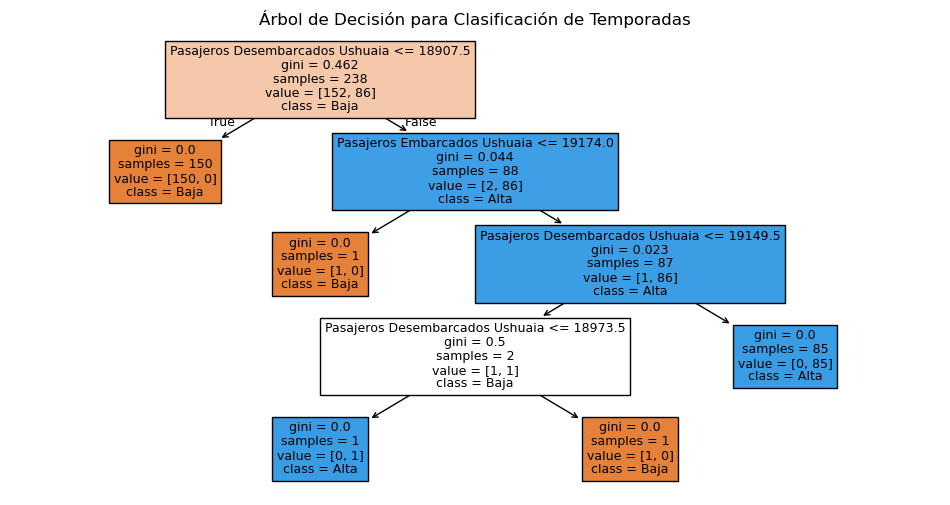

In [15]:
#Grafico del árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=X.columns, class_names=["Baja", "Alta"], filled=True)
plt.title("Árbol de Decisión para Clasificación de Temporadas")
plt.show()

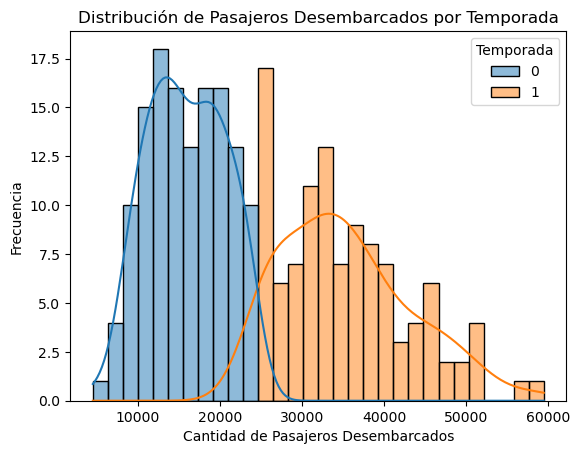

In [19]:
sns.histplot(totales_por_temporada, x="Pasajeros Desembarcados Totales", hue="Temporada", bins=30, kde=True)
plt.title("Distribución de Pasajeros Desembarcados por Temporada")
plt.xlabel("Cantidad de Pasajeros Desembarcados")
plt.ylabel("Frecuencia")
plt.show()

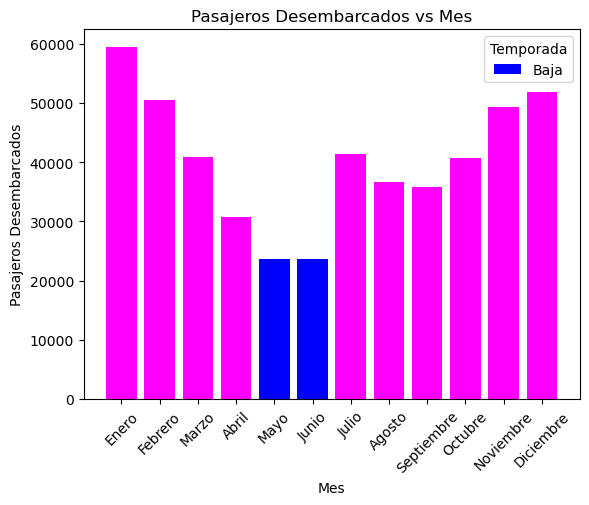

In [20]:
plt.bar(totales_por_temporada["Mes"], totales_por_temporada["Pasajeros Desembarcados Totales"],
        color=totales_por_temporada["Temporada"].map({0: "blue", 1: "magenta"}))
plt.xticks(rotation=45)
plt.title("Pasajeros Desembarcados vs Mes")
plt.xlabel("Mes")
plt.ylabel("Pasajeros Desembarcados")
plt.legend(title="Temporada", labels=["Baja","Alta"])
plt.show()

- Modelo 2: Clasificación de Anomalías en el Flujo de Pasajeros
    - Objetivo: Detectar si la cantidad de pasajeros embarcados/desembarcados es anormal comparado con otros años.
    - Variables: Año, Mes Numero, Pasajeros Desembarcados Totales, Pasajeros Embarcados Totales.
    - Modelos aplicado: K-Nearest Neighbors (KNN).

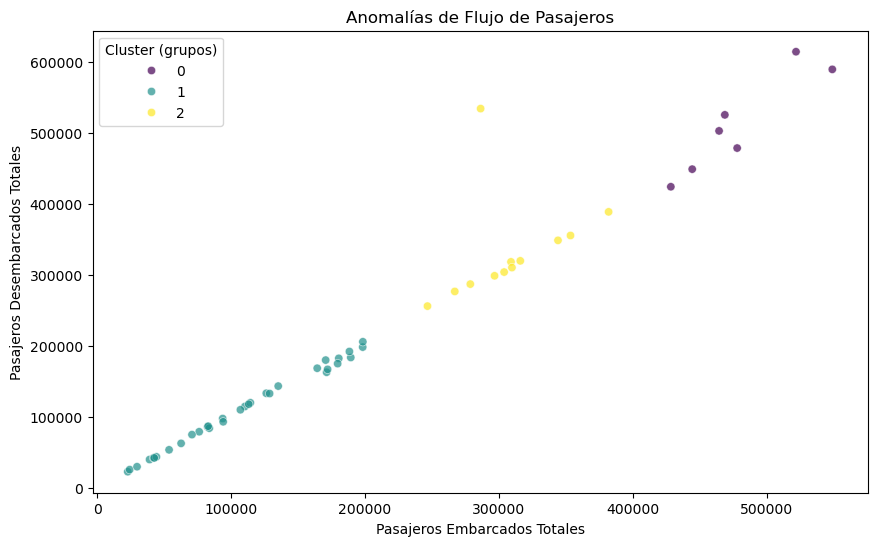

In [14]:
#Se crea nuevo DataFrame para excluir el año 2020 (Año de la pandemia)
totales_año_sin_2020 = totales_año[totales_año["Año"] != 2020]

#Se crea copia para no afectar el DataFrame totales_mes_sin_2020
totales_anomalias = totales_año_sin_2020.copy()

#Definición de variable independiente
X = totales_anomalias[['Pasajeros Embarcados Totales', 'Pasajeros Desembarcados Totales']]

#Escalado de datos para mejorar la detección de clusters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Se definen los parametros del modelo
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

#gregar etiquetas de cluster al DataFrame
totales_anomalias['Cluster'] = labels

#Visualización de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=totales_anomalias['Pasajeros Embarcados Totales'], 
                y=totales_anomalias['Pasajeros Desembarcados Totales'], 
                hue=totales_anomalias['Cluster'], palette="viridis", alpha=0.7)

plt.xlabel("Pasajeros Embarcados Totales")
plt.ylabel("Pasajeros Desembarcados Totales")
plt.title("Anomalías de Flujo de Pasajeros")
plt.legend(title="Cluster (grupos)")
plt.show()


- Modelo 3: Clasificación de Categorías de Flujos de Pasajeros
    - Objetivo: Clasificar si el flujo de pasajeros es bajo, medio o alto, según los embarques y desembarques.
    - Variables: Pasajeros Desembarcados Totales, Pasajeros Embarcados Totales, Estacion Numero.
    - Modelos aplicado: PCA.

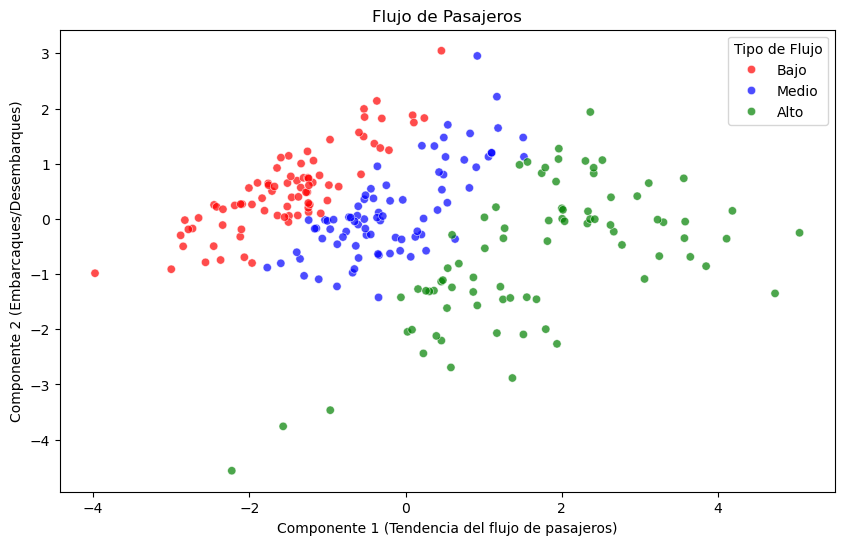

In [21]:
#Se eliminan filas con valores nulos
Flujo = totales_mes_sin_2020.copy()
Flujo.dropna(subset=["Pasajeros Desembarcados Totales"], inplace=True)

#Creación de etiqueta de movilidad
Flujo["Flujo"] = pd.qcut(Flujo["Pasajeros Embarcados Totales"], q=3, labels=["Bajo", "Medio", "Alto"])

#Definición de variables
X = Flujo[["Pasajeros Desembarcados Ushuaia", "Pasajeros Embarcados Ushuaia", 
                "Pasajeros Desembarcados Rio Grande", "Pasajeros Embarcados Rio Grande"]]
Y = Flujo["Flujo"]

#Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Generación de modelo
pca = PCA(n_components=2)  # Se reduce a 2 componentes para visualización
X_norm = pca.fit_transform(X_scaled)

#Se establecen los porcentajes de datos de entrenamiento y de prueba (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42, stratify=Y)

#Visualización de los datos transformados
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1], hue=Y, palette=["red", "blue", "green"], alpha=0.7)
plt.xlabel("Componente 1 (Tendencia del flujo de pasajeros)")
plt.ylabel("Componente 2 (Embarcaques/Desembarques)")
plt.title("Flujo de Pasajeros")
plt.legend(title="Tipo de Flujo")
plt.show()